In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Régression linéaire

In [2]:
house = pd.read_csv('house.csv')
house = house.loc[house["loyer"]<10000]

In [3]:
house.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


In [4]:
house.shape

(536, 2)

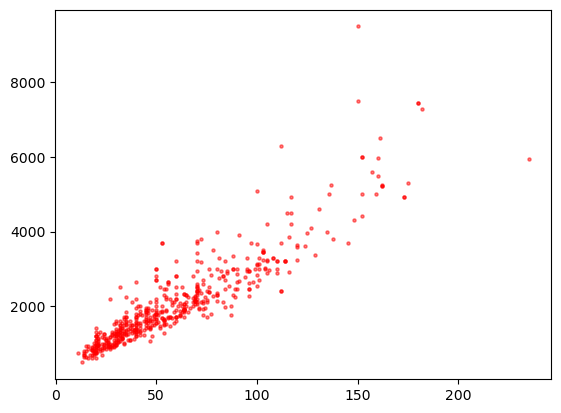

In [5]:
plt.scatter(house["surface"], house["loyer"], c="r", alpha=0.5, s=5)

In [6]:
x = np.matrix([np.ones(house.shape[0]), house["surface"].values]).T
y = np.matrix(house["loyer"]).T

In [7]:
tetha = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [8]:
tetha

matrix([[266.45460292],
        [ 30.66119596]])

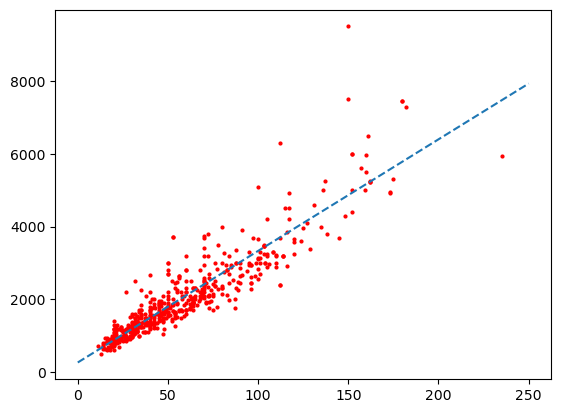

In [9]:
plt.scatter(house["surface"], house["loyer"], s=4, c='red')
plt.plot([0,250], [tetha.item(0), tetha.item(0)+250*tetha.item(1)], linestyle="--")

In [10]:
tetha.item(0)+tetha.item(1)*70

2412.7383202053943

# K-NN

In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [14]:
mnist.data[:1]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
mnist.target[:10]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [21]:
mnist.target.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [22]:
sample = np.random.randint(70000, size=5000)

In [25]:
data = mnist.data.iloc[sample]
target = mnist.target.iloc[sample]

In [24]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
42314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
target

42314    8
23171    2
12678    7
41096    4
35004    9
        ..
26291    3
49040    5
68709    4
10780    9
39893    6
Name: class, Length: 5000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [27]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.8)

In [40]:
from sklearn import neighbors

In [50]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
import matplotlib.pyplot as plt

/Users/sebastienmorichon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sebastienmorichon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

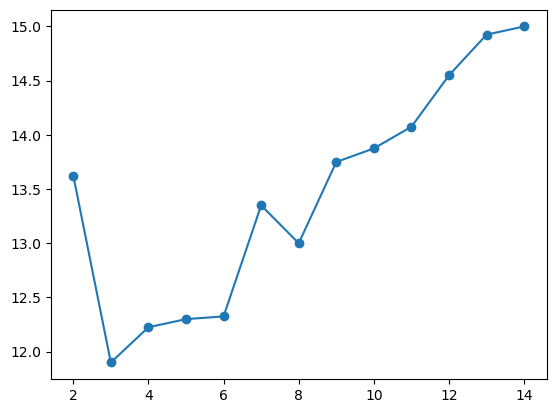

In [72]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1-(knn.fit(x_train, y_train).score(x_test, y_test))))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [69]:
errors

[13.624999999999998,
 11.899999999999999,
 12.224999999999998,
 12.3,
 12.324999999999998,
 13.349999999999994,
 13.0,
 13.749999999999996,
 13.875000000000004,
 14.075000000000005,
 14.549999999999997,
 14.924999999999999,
 15.000000000000002]

/Users/sebastienmorichon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


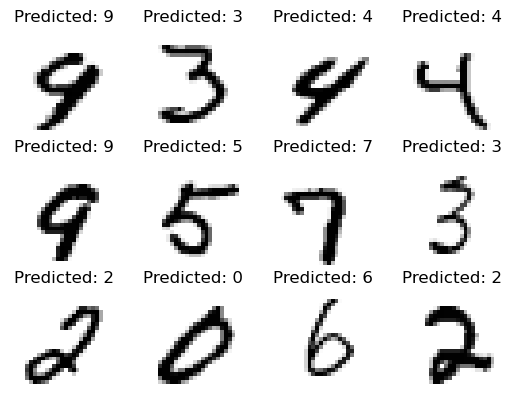

In [100]:
#Affichage des images

# On initialise notre K-NN
knn = neighbors.KNeighborsClassifier(3)
knn.fit(x_train, y_train)

# On prédit les données
predicted = knn.predict(x_test)

# On redimentionne nos images
images = x_test.values.reshape((-1,28,28))

# On selectionne 12 images aléatoirement
select = np.random.randint(images.shape[0], size=12)

# Affichage graphique
fig, ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis("off")
    plt.imshow(images[value], cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]))
plt.show()

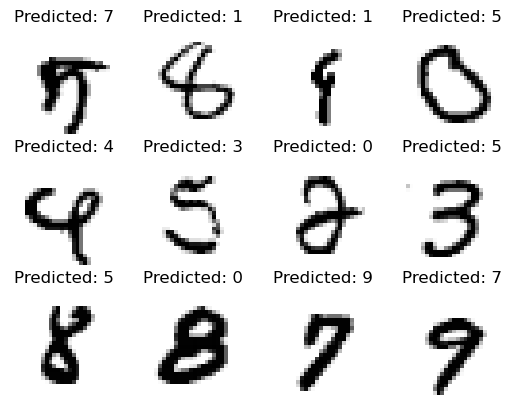

In [101]:
# on récupère les données mal prédites 
misclass = (y_test != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()